This is my approach to linear regression problem. 

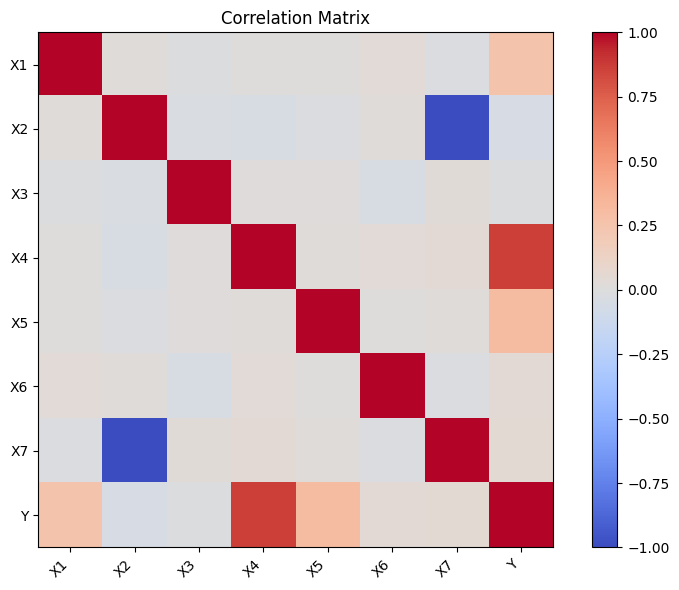

In [1]:
import numpy as np
from linear_regression import filename, LinearRegressionModel, StopCondition, RidgeRegressionFunction, Uninomial, \
    QuadraticLossFunction, Linear, LassoRegressionFunction, Zeros, Custom, Gaussian, ElasticNetworkLossFunction

model = LinearRegressionModel(filename, True)
model.set_parameters(loss_function=QuadraticLossFunction(), base_function=Linear())
model.corr()

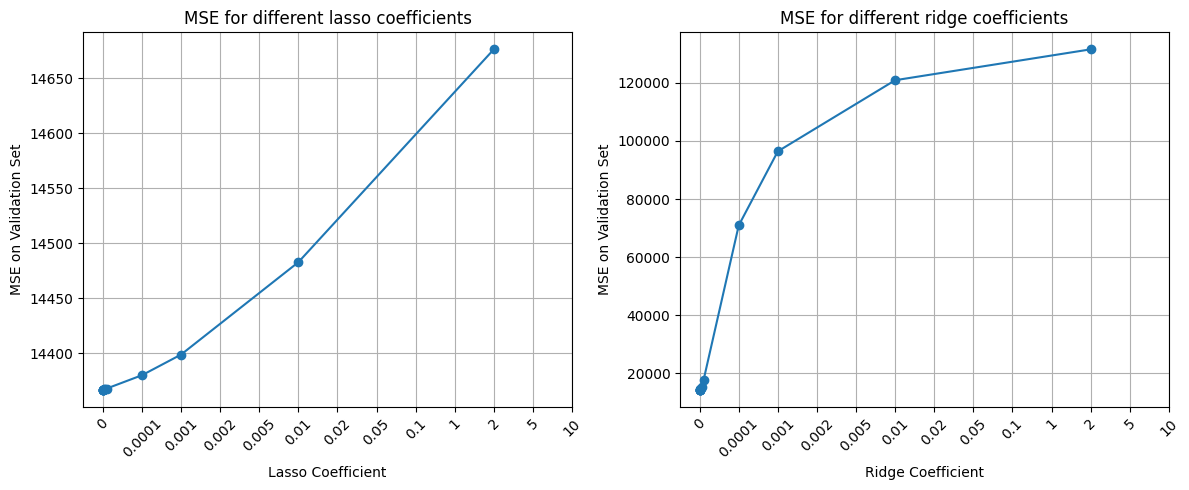

In [8]:
# a, b = model.estimate_coef()
model.estimate_coef()
model.plot_reg_coef()

In [10]:

diff_2 = lambda x: [*[x[i] for i in range(8)],
                      *[x[i] * x[j] for i in range(1, 8) for j in range(i, 8)]]
diff_3 = lambda x: [*[x[i] for i in range(8)],
                      *[x[i] * x[j] for i in range(1, 8) for j in range(i, 8)],
                      *[x[i] * x[j] * x[k] for i in range(1, 8) for j in range(i, 8) for k in range(j, 8)]]
func = Custom()
func.setdiff(diff_3)
model.set_parameters(base_function=func)

In [ ]:
model.set_parameters(eta=0.01, stop=0.005, rep_count=4000, condition=StopCondition.Both)
model.set_parameters(mini_batch=True   , batch_size=64, print_c=-1)
model.linear_regression()

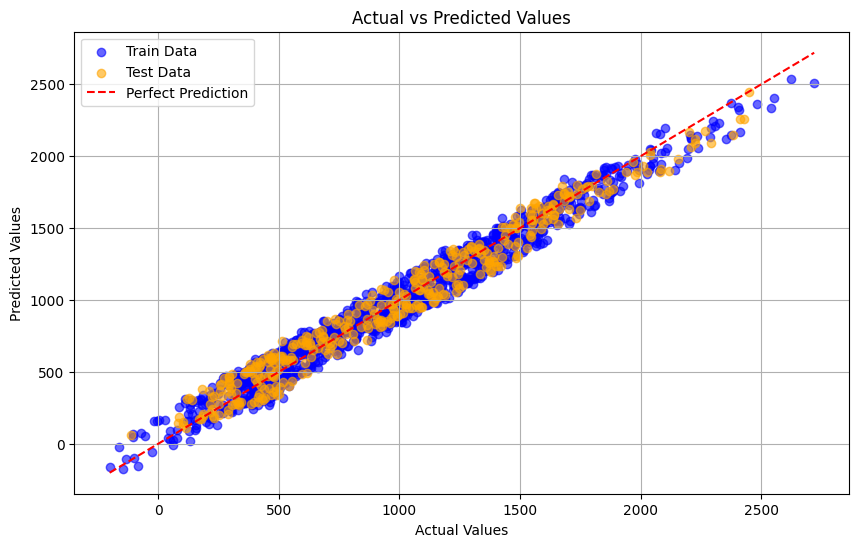

Train Set MSE: 4627.3449957040075
Test Set MSE: 4804.8912920300245


In [12]:
model.print_results()
model.results()

In [9]:
model.set_parameters(base_function=Linear())
model.solve_analytically(0.1)
print(model.theta)

[ 9.63491986e+02  1.32948800e+02 -7.47260159e+00 -6.45952771e+00
  4.53040103e+02  1.49335854e+02 -2.72226749e-01  7.47260159e+00]


In [ ]:
from random import randrange
i = randrange(0, len(model.test) - 1, 1)
p = model.prediction([1, *[model.test[i][j] for j in range(len(model.test[0]) - 1)]])
a = model.test[i][-1]
np.set_printoptions(precision=2)
print(f"prediction: {"%0.2f" %  p}. actual: {"%0.2f" %  a}, error = {"%0.2f" % (abs(p - a) / a * 100)}%")

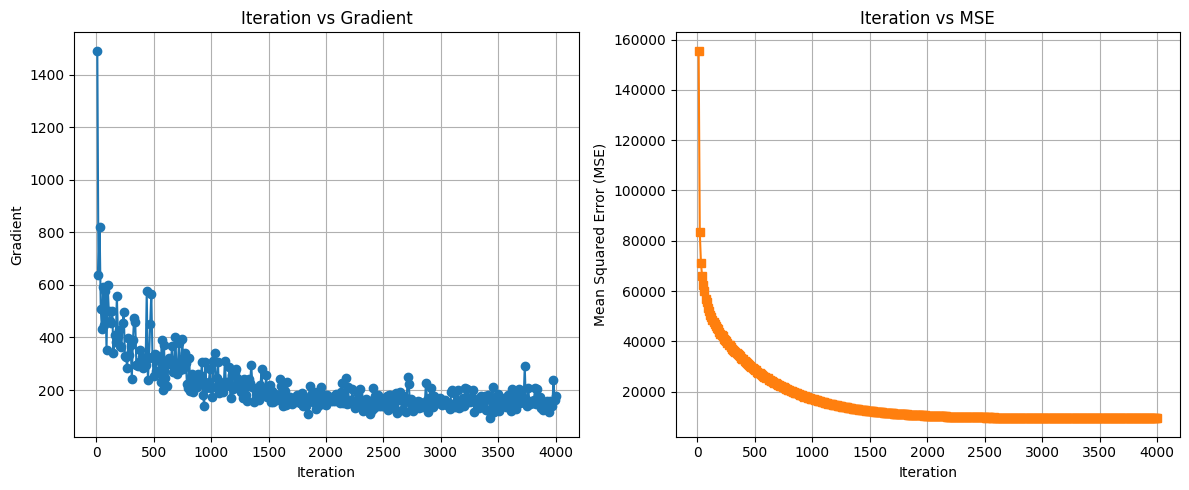

In [9]:
model.plot_learning_curves()

In [ ]:
for l in [0.000001, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100, 1000, 100000]:
    print(f"\lambda = {l}")
    model.set_parameters(base_function=Linear())
    model.solve_analytically(l)
    model.results()

In [ ]:
batch_size = 512
model.set_parameters(base_function=Linear())
model.set_parameters(eta=0.01, stop=0.005, rep_count=1000, condition=StopCondition.Both)
model.set_parameters(mini_batch=True   , batch_size=batch_size, print_c=10)
model.linear_regression()

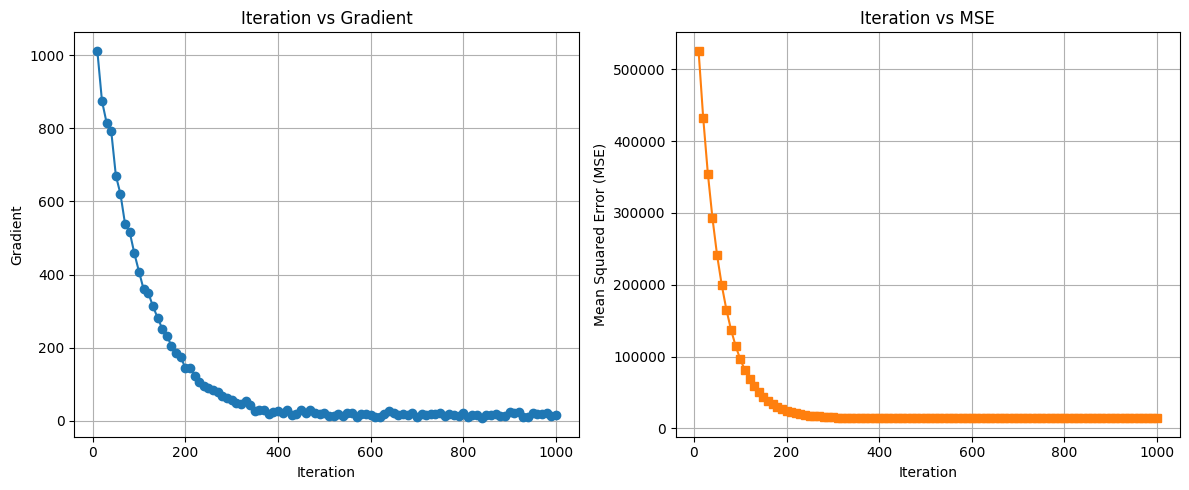

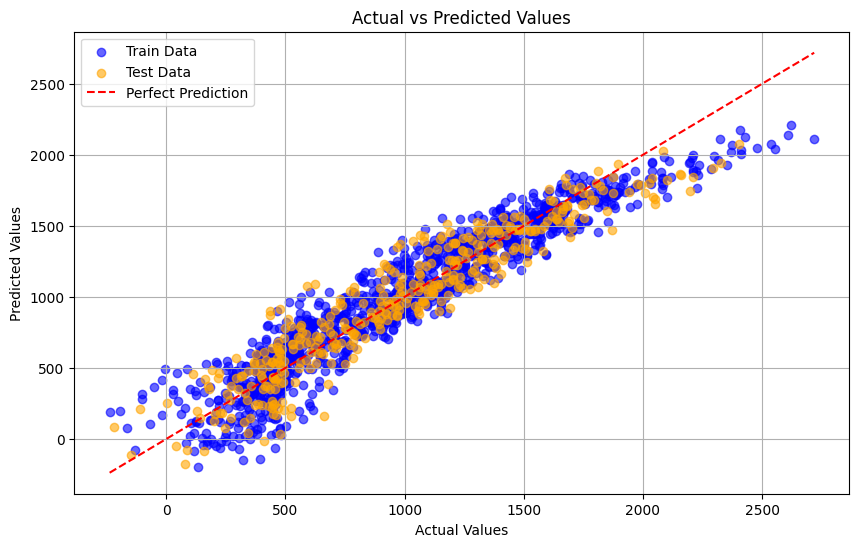

Train Set MSE: 14126.153991983667
Test Set MSE: 14633.804680905068


In [42]:
model.plot_learning_curves()
model.print_results()
model.results()